In [1]:
import pandas as pd
import janitor
from graph_utils import (
    save_mpl_fig,
    plotline, 
)

FP = '../../readable_news_lf/toi_textstat.csv.gz'

In [2]:
df = (pd.read_csv(FP)
      .assign(
          date=lambda df: pd.to_datetime(df.numericpubdate, format='%Y%m%d'),
          qtr=lambda df: [dt.to_period('Q') for dt in df.date]
      )      
      # Drop outliers by length
      .pipe(lambda df: 
            df.query(f'terms>{df.terms.quantile(q=0.01)} & terms<{df.terms.quantile(q=0.99)}'))
      .query(f'terms>100')      
     )
nsample = len(df)

periods = (2008-1839 + 1)*4 + 1
time_index = pd.date_range("10/01/1838", periods=periods, freq="QS")

df = (df      
      .groupby(['qtr']).mean().reset_index()
      .sort_values('qtr')
      .set_index('qtr')
      .reindex([dt.to_period('Q')for dt in time_index])      
      .reset_index())
df.head(3)


,qtr,oix,numericpubdate,terms,uniqueterms,ttr,mtld,hdd
0,1838Q4,3.288876e+06,1.838117e+07,556.876238,277.825083,0.556341,108.306454,0.837003
1,1839Q1,3.242113e+06,1.839021e+07,531.055046,278.289501,0.575688,111.909952,0.839793
2,1839Q2,3.238343e+06,1.839052e+07,510.430921,277.950658,0.592223,128.870479,0.848405


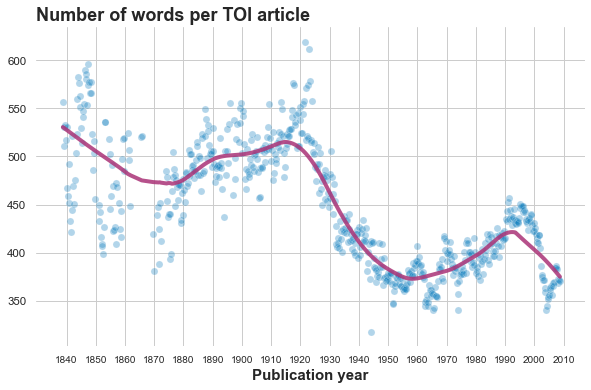

In [3]:
ax = plotline(x=df.index, y=df.terms, 
              bw=0.2,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              markersize=50,
              tickersize=10,
              title='Number of words per TOI article', 
             )    
save_mpl_fig('../figs/toi_number_of_words')

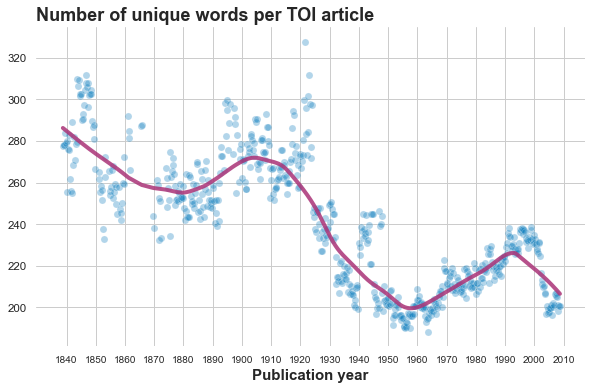

In [4]:
ax = plotline(x=df.index, y=df.uniqueterms, 
              bw=0.2,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              markersize=50,
              tickersize=10,
              title='Number of unique words per TOI article', 
             )    
save_mpl_fig('../figs/toi_number_of_uniquewords')

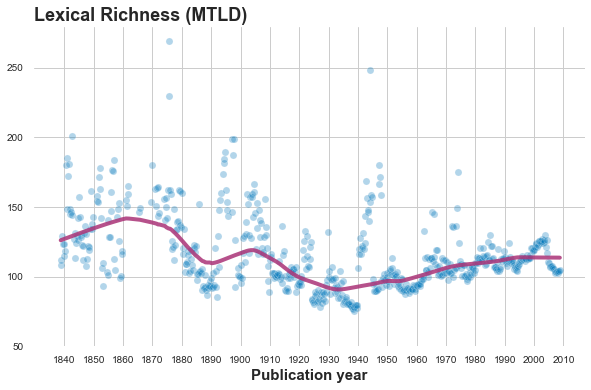

In [5]:
ax = plotline(x=df.index, y=df.mtld, 
              bw=0.2,
              xrange=range(5, len(df)+40, 40),
              xticklabels=range(1840, 2015, 10),
              yrange=range(50,300,50), 
              markersize=50,
              tickersize=10,
              title='Lexical Richness (MTLD)', 
             )    
save_mpl_fig('../figs/toi_lexicalrichness')